<center><h1>DSCI 552 Machine Learning for Data Science HW2</h1></center>
<br>
<center> <font size="4">Name:Chung Ming Wu</font></center>

<center> USC_ID:7703568593</center>
    
<center> Github_Username:andywu96 </center>

### (a) Download the Combined Cycle Power Plant data from:

In [1]:
import pandas as pd
import numpy as np

In [2]:
#open excel file
df = pd.read_excel('../data/Folds5x2_pp.xlsx', sheet_name= 'Sheet1')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
# check data type
df.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

### (b) Exploring the data:

### (b)-(i)How many rows are in this data set? How many columns? What do the rows and columns represent?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


There are 9568 rows and 5 columns in the dataframe, each row represent a data point its features. Those features consist of hourly average ambient variables Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH), and Exhaust Vacuum (V) to predict the net hourly electrical energy output (PE) of the plant from a Combined Cycle Power Plant over 6 years (2006-2011).

### (b)-(ii) Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

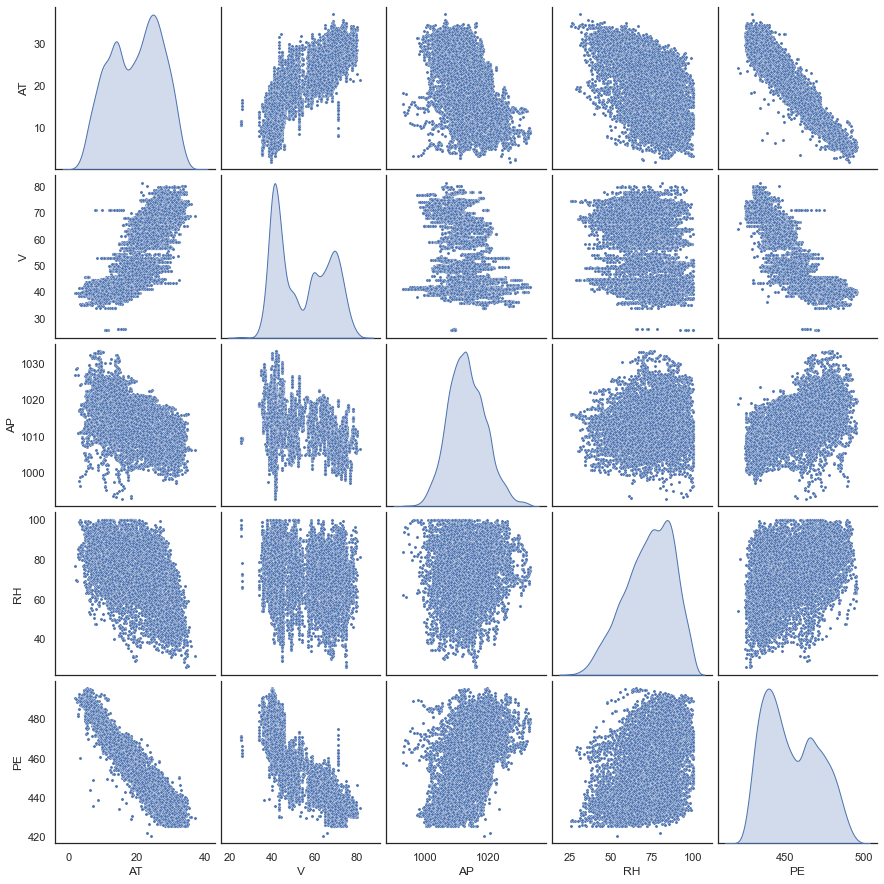

In [5]:
#draw the scatterplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white") 
sns.pairplot(df,diag_kind="kde", plot_kws=dict(s=10))
plt.show()

<AxesSubplot:>

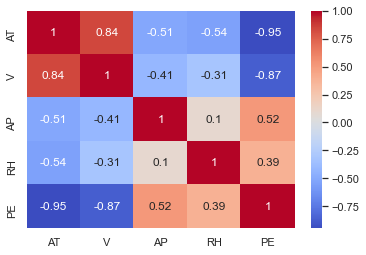

In [6]:
# Using Heat map to show the correlation matrix

corrMatrix = df.corr()
plt.show()

sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

We find that the average ambient variables Temperature (AT) has the most correlation rate with the net hourly electrical energy output (PE), which is -0.95. 

### (b)-(iii). What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [7]:
df2 = df.copy()
df2 = df.describe().T
df2['range'] = df2['max']- df2['min']
df2['interquartile_ranges'] = df2['75%']- df2['25%']
df2 = df2.drop(columns = ['count','std','min','max'], axis=0)
df2 = df2.rename(columns={'25%': ' first_quartiles', '50%': ' median','75%': ' third_quartiles'})
df2

,mean,first_quartiles,median,third_quartiles,range,interquartile_ranges
AT,19.651231,13.5100,20.345,25.72,35.30,12.2100
V,54.305804,41.7400,52.080,66.54,56.20,24.8000
AP,1013.259078,1009.1000,1012.940,1017.26,40.41,8.1600
RH,73.308978,63.3275,74.975,84.83,74.60,21.5025
PE,454.365009,439.7500,451.550,468.43,75.50,28.6800


### (C) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

In [8]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

SLR model AT with PE 
R-Square =  0.899


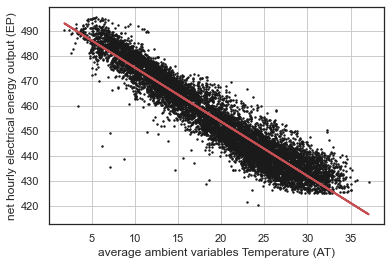

In [9]:
df3 = df.copy()
model_1 =smf.ols('PE ~ AT',data =df3).fit()
df3["yhat_AT"]  = model_1.predict(df3)

# R-square
print('SLR model AT with PE ')
print('R-Square = ', round(model_1.rsquared,3))

# plot
plt.figure()
plt.scatter(df3.AT, df3.PE, c="k", s=2)
plt.plot (df3.AT, df3.yhat_AT, color = "r", linewidth = 2 )
plt.ylabel('net hourly electrical energy output (EP)')
plt.xlabel('average ambient variables Temperature (AT)')
plt.grid()

SLR model V with PE 
R-Square =  0.757


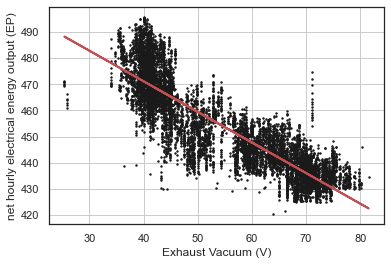

In [10]:
model_2 =smf.ols('PE ~ V',data =df3).fit()
model_2.summary()
df3["yhat_V"]  = model_2.predict(df3)

# R-square
print('SLR model V with PE ')
print('R-Square = ', round(model_2.rsquared,3))

# plot
plt.figure()
plt.scatter(df3.V, df3.PE, c="k", s=2)
plt.plot (df3.V, df3.yhat_V, color = "r", linewidth = 2 )
plt.ylabel('net hourly electrical energy output (EP)')
plt.xlabel('Exhaust Vacuum (V)')
plt.grid()

SLR model AP with PE 
R-Square =  0.269


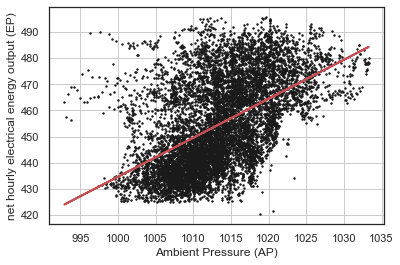

In [11]:
model_3 =smf.ols('PE ~ AP',data =df3).fit()
model_3.summary()
df3["yhat_AP"]  = model_3.predict(df3)

# R-square
print('SLR model AP with PE ')
print('R-Square = ', round(model_3.rsquared,3))

# plot
plt.figure()
plt.scatter(df3.AP, df3.PE, c="k", s=2)
plt.plot (df3.AP, df3.yhat_AP, color = "r", linewidth = 2 )
plt.ylabel('net hourly electrical energy output (EP)')
plt.xlabel('Ambient Pressure (AP)')
plt.grid()

SLR model RH with PE 
R-Square =  0.152


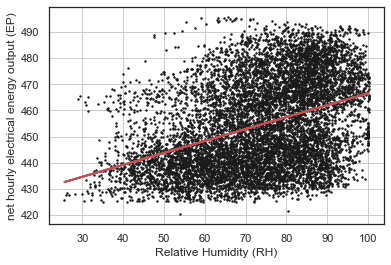

In [12]:
model_4 =smf.ols('PE ~ RH',data =df3).fit()
df3["yhat_RH"]  = model_4.predict(df3)

# R-square
print('SLR model RH with PE ')
print('R-Square = ', round(model_4.rsquared,3))

# plot
plt.figure()
plt.scatter(df3.RH, df3.PE, c="k", s=2)
plt.plot (df3.RH, df3.yhat_RH, color = "r", linewidth = 2 )
plt.ylabel('net hourly electrical energy output (EP)')
plt.xlabel('Relative Humidity (RH)')
plt.grid()

Based on above 4 SLR models, It seems that model_1 (AT with PE) has the most statistically significant association between the predictor and the response, which its R-Square is 0.899, and almost all points are nearby the prediction line with smallest residuals(which means few outliers).

In [13]:
#create instance of influence
influence = []

for z in [model_1, model_2, model_3, model_4]:
    influence.append(z.get_influence())
    s = z.outlier_test()
    print( " outliers are ", s[s['bonf(p)']<.05].index.values)

 outliers are  [3117 3383 3895 4218 7375 7398 7664 8187 8362]
 outliers are  [3103]
 outliers are  []
 outliers are  []


Besides, using Outliers test we find that AT & V exist some outliers we need to remove from the data 

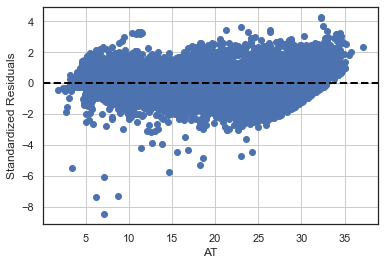

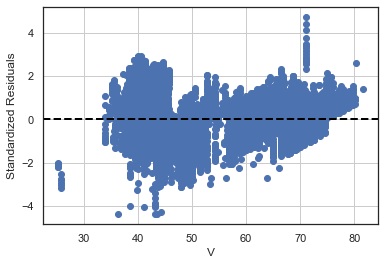

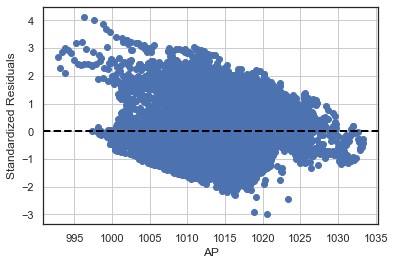

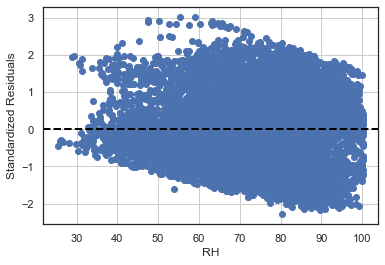

In [14]:
#obtain standardized residuals
standardized_residuals = []

for i in range(4):
    standardized_residuals.append(influence[i].resid_studentized_internal)
    plt.scatter(df3.iloc[:,i], standardized_residuals[i])
    df3.columns.values.tolist()
    plt.xlabel(df3.columns[i])
    plt.ylabel('Standardized Residuals')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
    plt.grid()
    plt.show()

All above charts are standardized residualsl vs predictors Since the residuals appear to be randomly scattered around zero, this is an indication that heteroscedasticity is not a problem with the predictor variable.

### (d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : Beta(j) = 0?

In [15]:
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

df5 = df.copy()
model_5 =smf.ols('PE ~ AT + V + AP + RH  ',data =df5).fit()
model_5.summary() 
# This is MLR with R-squared 0.929

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Thu, 10 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:41:36   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.000     435.500     473.718
AT            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
V             -0.2339      0.007    -32.122      0.000      -0.248      -0.220
AP             0.0621      0.009      6.564      0.000       0.044       0.081
RH            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
df5["yhat"]  = model_5.predict(df5)
round(mean_squared_error(df5.PE, df5.yhat),3)

20.767

In this MLR model, R-squared is 0.929 and MSE is 20.767, which means it can explains 92.9% of PE variability, it seems a good model to fit the data. All 4 predictors, AT, V, AP, and RH reject null hypothesis H0, which means all of them are statistically significant in the model, but might exists some multicollinearity. 

### (e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

In [17]:
# extract all SLR_coeff
SLR_coeff = []

for i in range(1,5):
    A =  'model_' + str(i) + '.params'
    Z =  eval(A)
    SLR_coeff.append(Z[1])
    next 

# extract all MLR_coeff
    
MLR_coeff = []
for i in model_5.params[1:]:
    MLR_coeff.append(i)    

Text(0.5, 0, 'SLR Coefficients')

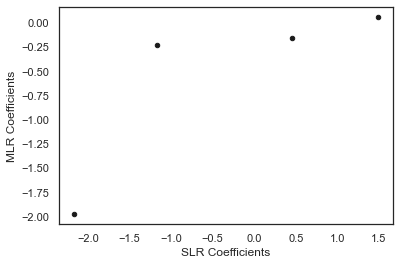

In [18]:
# convert into a dataframe
df6 = pd.DataFrame({'SLR':SLR_coeff,'MLR':MLR_coeff})

# plot
plt.figure()
plt.scatter(df6.SLR, df6.MLR, c="k", s=20)
plt.ylabel('MLR Coefficients')
plt.xlabel('SLR Coefficients')

### (f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.000     491.409     494.047
x1            -0.6103      0.124     -4.941      0.000      -0.852      -0.368
x2            -0.1251      0.007    -18.199      0.000      -0.139      -0.112
x3             0.0027      0.000     22.594      0.000       0.002       0.003
MSE of Polynomial regression of AT 25.664


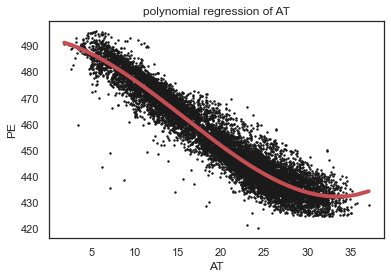

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.000     536.209     572.084
x1            -2.1444      0.509     -4.214      0.000      -3.142      -1.147
x2            -0.0027      0.009     -0.294      0.768      -0.021       0.015
x3             0.0001   5.45e-05      2.465      0.014    2.75e-05       0.000
MSE of Polynomial regression of V 65.525


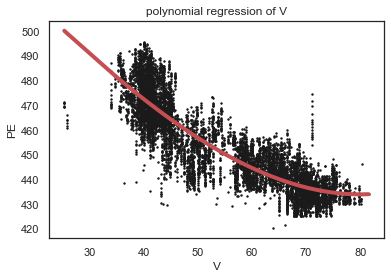

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.000       0.057       0.092
x1            25.2556      3.001      8.415      0.000      19.372      31.139
x2            -0.0500      0.006     -8.439      0.000      -0.062      -0.038
x3          2.514e-05   2.92e-06      8.613      0.000    1.94e-05    3.09e-05
MSE of Polynomial regression of AP 211.197


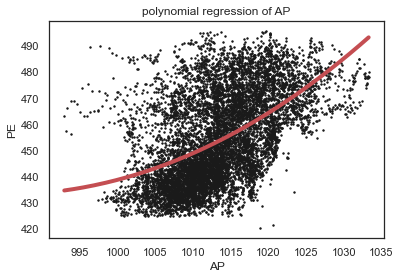

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.000     447.744     489.083
x1            -1.7292      0.486     -3.557      0.000      -2.682      -0.776
x2             0.0321      0.007      4.433      0.000       0.018       0.046
x3            -0.0002   3.51e-05     -4.340      0.000      -0.000   -8.34e-05
MSE of Polynomial regression of RH 246.474


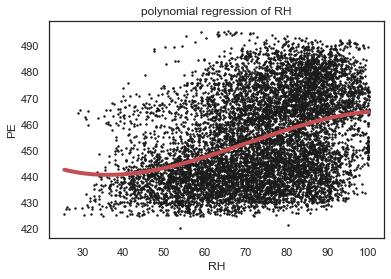

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
df7 = df.copy()

for i in range (4):
    # sort by and polynomial-featuring 
    df7 = df7.sort_values(by = [df7.columns[i]])
    x_f = df7.iloc[:,i]
    y_f = df7.iloc[:,-1]
    x_f = x_f.values.reshape(-1,1)
    y_f = y_f.values.reshape(-1,1)
    
    # fit a poly model
    poly = PolynomialFeatures(degree=3)
    x_poly = poly.fit_transform(x_f)
    
    poly_reg  = sm.OLS(y_f, x_poly).fit()
    print(poly_reg.summary().tables[1])
    yhat = poly_reg.predict(poly.fit_transform(x_f))
    print( "MSE of Polynomial regression of " + df7.columns[i] ,(round(mean_squared_error(y_f, yhat),3)))
    
    
    
    # plot
    plt.scatter(x_f, y_f, color = 'k', s =2)
    plt.plot(x_f ,yhat , color = 'r', lw = 4)
    plt.title('polynomial regression of '+ df7.columns[i])
    plt.xlabel(df7.columns[i])
    plt.ylabel('PE')
    plt.show()

I found that only square of V exists statistically nonsignificant, which accept null hypothesis H0, but cubed of V still exists statistically significant, thus, all AT, V, AP, RH exist nonlinear association with PE.

### (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [20]:
df8 = df.copy()
model_10 =smf.ols('PE ~  AT + V + AP + RH + AT * V + AT * AP + AT * RH + V * AP + V * RH +  AP * RH ',data =df8).fit()
model_10.summary() 
# This is MLR with R-squared 0.936

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Thu, 10 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:41:37   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.000     531.631     839.934
AT            -4.3470      2.373     -1.832      0.067      -8.999       0.305
V             -7.6749      1.351     -5.682      0.000     -10.323      -5.027
AP            -0.1524      0.077     -1.983      0.047      -0.303      -0.002
RH             1.5709      0.773      2.031      0.042       0.055       3.087
AT:V           0.0210      0.001     23.338      0.000       0.019       0.023
AT:AP          0.0018      0.002      0.752      0.452      -0.003       0.006
AT:RH         -0.0052      0.001     -6.444      0.000      -0.007      -0.004
V:AP           0.0068      0.001      5.135      0.000       0.004       0.009
V:RH           0.0008      0.000      1.716      0.086      -0.000       0.002
AP:RH         -0.0016      0.001     -2.125      0.034      -0.003      -0.000
==============================================================================
Omnibus:                     1454.609   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9170.848
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       7.657   Cond. No.                     1.70e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We found that P-Value less than 0.05 in interaction terms are AT&V, AT&RH, V&AP, AP&RH, which means those predictors are statistically significant and exists collinearity between those interaction

### (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [21]:
# To split data
from sklearn.model_selection import train_test_split
df9 = df.copy()
X = df9.iloc[:,:4]
y = df9.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# Combine back to dataframe
train_set = pd.concat([X_train , y_train], axis = 1)
test_set = pd.concat([X_test , y_test], axis = 1)

In [22]:
# Fit the first model with all predictors with 70% of data

MSE_model_11 = []
for i in [train_set, test_set]:
    print(i)
    model_11 =smf.ols('PE ~ AT + V + AP + RH', data = train_set).fit()
    yhat_1  = model_11.predict(i)
    print(model_11.summary())
    MSE_model_11.append(round(mean_squared_error(i.PE, yhat_1),3))

         AT      V       AP     RH      PE
8759  16.69  44.78  1010.41  58.18  456.17
1434  24.12  58.66  1011.55  58.96  450.69
7320   9.08  40.02  1031.20  75.34  476.69
2579   9.60  41.82  1032.93  72.63  475.01
9142  20.77  56.85  1012.40  83.63  442.85
...     ...    ...      ...    ...     ...
5734  23.39  61.87  1010.35  48.91  444.03
5191  11.63  40.55  1022.89  87.12  474.67
5390  27.79  69.23  1012.86  45.71  435.06
860   12.26  41.50  1014.87  89.41  471.13
7270  11.75  40.55  1018.09  97.70  472.43

[6697 rows x 5 columns]
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.194e+04
Date:                Thu, 10 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:41:37   Log-Likelihood:         

### Using Backward selection for the second model 

In [23]:
model_12 = smf.ols('PE ~ AT + V + AP + RH + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH + I(AT**2) + I(V**2) + I(AP**2) + I(RH**2)  ', data = train_set).fit()
model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7272.
Date:                Thu, 10 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:41:37   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6682   BIC:                         3.845e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7664.9809   1429.568     -5.362      0.000   -1.05e+04   -4862.572
AT            -7.2885      3.628     -2.009      0.045     -14.401      -0.176
V             -1.9590      1.765     -1.110      0.267      -5.420       1.502
AP            15.9308      2.772      5.746      0.000      10.496      21.366
RH             3.9121      1.028      3.805      0.000       1.897       5.928
AT:V           0.0095      0.003      2.949      0.003       0.003       0.016
AT:AP          0.0046      0.004      1.291      0.197      -0.002       0.011
AT:RH         -0.0053      0.002     -2.963      0.003      -0.009      -0.002
V:AP           0.0015      0.002      0.876      0.381      -0.002       0.005
V:RH          -0.0001      0.001     -0.167      0.867      -0.002       0.001
AP:RH         -0.0036      0.001     -3.623      0.000      -0.006      -0.002
I(AT ** 2)     0.0185      0.004      5.031      0.000       0.011       0.026
I(V ** 2)     -0.0004      0.001     -0.386      0.700      -0.002       0.001
I(AP ** 2)    -0.0078      0.001     -5.765      0.000      -0.010      -0.005
I(RH ** 2)    -0.0019      0.000     -6.065      0.000      -0.003      -0.001
==============================================================================
Omnibus:                     1187.007   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8209.369
Skew:                          -0.669   Prob(JB):                         0.00
Kurtosis:                       8.256   Cond. No.                     2.85e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
model_12 = smf.ols('PE ~ AT + V + AP + RH + AT*V + AT*AP + AT*RH + V*AP + AP*RH + I(AT**2) + I(V**2) + I(AP**2) + I(RH**2)  ', data = train_set).fit()
model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7832.
Date:                Thu, 10 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:41:37   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6683   BIC:                         3.844e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7677.4947   1427.498     -5.378      0.000   -1.05e+04   -4879.143
AT            -7.1420      3.521     -2.029      0.043     -14.043      -0.241
V             -2.0451      1.688     -1.212      0.226      -5.354       1.264
AP            15.9551      2.768      5.763      0.000      10.528      21.382
RH             3.9434      1.011      3.901      0.000       1.962       5.925
AT:V           0.0098      0.002      4.018      0.000       0.005       0.015
AT:AP          0.0044      0.003      1.286      0.198      -0.002       0.011
AT:RH         -0.0055      0.001     -5.669      0.000      -0.007      -0.004
V:AP           0.0016      0.002      0.955      0.340      -0.002       0.005
AP:RH         -0.0036      0.001     -3.712      0.000      -0.006      -0.002
I(AT ** 2)     0.0181      0.003      6.362      0.000       0.013       0.024
I(V ** 2)     -0.0004      0.001     -0.513      0.608      -0.002       0.001
I(AP ** 2)    -0.0078      0.001     -5.782      0.000      -0.010      -0.005
I(RH ** 2)    -0.0019      0.000     -6.945      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     1187.236   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8216.085
Skew:                          -0.669   Prob(JB):                         0.00
Kurtosis:                       8.259   Cond. No.                     2.85e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
model_12 = smf.ols('PE ~ AT + V + AP + RH + AT*V + AT*AP + AT*RH + V*AP + AP*RH + I(AT**2) + I(AP**2) + I(RH**2)', data = train_set).fit()
model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     8486.
Date:                Thu, 10 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:41:37   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6684   BIC:                         3.844e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7693.6035   1427.075     -5.391      0.000   -1.05e+04   -4896.082
AT            -7.2403      3.515     -2.060      0.039     -14.131      -0.350
V             -2.0111      1.687     -1.192      0.233      -5.318       1.295
AP            15.9841      2.768      5.775      0.000      10.559      21.410
RH             3.9648      1.010      3.926      0.000       1.985       5.945
AT:V           0.0089      0.002      5.524      0.000       0.006       0.012
AT:AP          0.0046      0.003      1.327      0.185      -0.002       0.011
AT:RH         -0.0056      0.001     -5.769      0.000      -0.007      -0.004
V:AP           0.0015      0.002      0.920      0.358      -0.002       0.005
AP:RH         -0.0036      0.001     -3.733      0.000      -0.006      -0.002
I(AT ** 2)     0.0187      0.003      7.339      0.000       0.014       0.024
I(AP ** 2)    -0.0078      0.001     -5.793      0.000      -0.010      -0.005
I(RH ** 2)    -0.0019      0.000     -7.007      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     1187.391   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8203.546
Skew:                          -0.670   Prob(JB):                         0.00
Kurtosis:                       8.254   Cond. No.                     2.84e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
model_12 = smf.ols('PE ~ AT + V + AP + RH + AT*V + AT*AP + AT*RH + AP*RH + I(AT**2) + I(AP**2) + I(RH**2)', data = train_set).fit()
model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     9258.
Date:                Thu, 10 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:41:37   Log-Likelihood:                -19161.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6685   BIC:                         3.843e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7568.5210   1420.561     -5.328      0.000   -1.04e+04   -4783.768
AT            -9.6925      2.290     -4.232      0.000     -14.182      -5.203
V             -0.4604      0.032    -14.362      0.000      -0.523      -0.398
AP            15.7203      2.753      5.711      0.000      10.324      21.117
RH             3.7204      0.974      3.818      0.000       1.810       5.630
AT:V           0.0082      0.001      5.663      0.000       0.005       0.011
AT:AP          0.0070      0.002      3.174      0.002       0.003       0.011
AT:RH         -0.0055      0.001     -5.742      0.000      -0.007      -0.004
AP:RH         -0.0034      0.001     -3.619      0.000      -0.005      -0.002
I(AT ** 2)     0.0195      0.002      8.112      0.000       0.015       0.024
I(AP ** 2)    -0.0076      0.001     -5.726      0.000      -0.010      -0.005
I(RH ** 2)    -0.0019      0.000     -7.046      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     1185.647   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8149.657
Skew:                          -0.670   Prob(JB):                         0.00
Kurtosis:                       8.235   Cond. No.                     2.83e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Finding the best second model, after 3 iteration run, we drop the interation of V & RH,	the square of V, and the interation of V & AP. We found that all left over predcitors are statistically significant. We will use this final model to run the as a second model.

In [27]:
# Fit the second model with all possible interaction terms and quadratic nonlinearities

MSE_model_12 = []
for i in [train_set, test_set]:
    print(i)
    model_12 = smf.ols('PE ~ AT + V + AP + RH + AT*V + AT*AP + AT*RH + AP*RH + I(AT**2) + I(AP**2) + I(RH**2)', data = train_set).fit()
    yhat_2 = model_12.predict(i)
    print(model_12.summary())
    MSE_model_12.append(round(mean_squared_error(i.PE, yhat_2),3))

         AT      V       AP     RH      PE
8759  16.69  44.78  1010.41  58.18  456.17
1434  24.12  58.66  1011.55  58.96  450.69
7320   9.08  40.02  1031.20  75.34  476.69
2579   9.60  41.82  1032.93  72.63  475.01
9142  20.77  56.85  1012.40  83.63  442.85
...     ...    ...      ...    ...     ...
5734  23.39  61.87  1010.35  48.91  444.03
5191  11.63  40.55  1022.89  87.12  474.67
5390  27.79  69.23  1012.86  45.71  435.06
860   12.26  41.50  1014.87  89.41  471.13
7270  11.75  40.55  1018.09  97.70  472.43

[6697 rows x 5 columns]
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     9258.
Date:                Thu, 10 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:41:37   Log-Likelihood:         

In [28]:
# Report MSE with Train and Test data
Error_rate = pd.DataFrame( [MSE_model_11, MSE_model_12], columns=['Train data MSE', 'Test data MSE' ] )
Error_rate.index = pd.Series(['Model1', 'Model2'])
Error_rate

,Train data MSE,Test data MSE
Model1,20.581,21.24
Model2,17.891,18.66


It is obvious that both Train MSE and Test MSE drop in Model 2, which means that the data exists multicollinearity and non-linearity of the response-predictor relationships. 

### (i) KNN Regression: i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k = {1; 2; : : : ; 100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

Manhattan Weighted Distance:
Best testing error K* =  5
Best testing error =  15.727


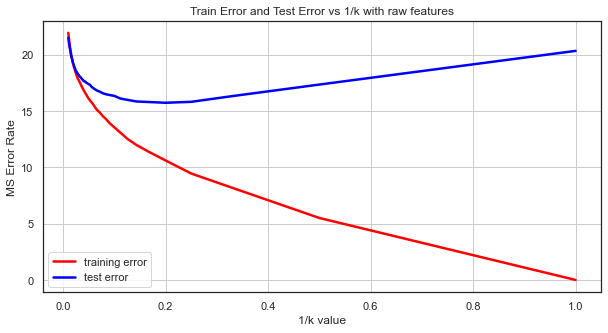

In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

# Doing data scaling with  MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Create KNN Model to find optimal k*
nn = range(1,101,1)

training_error_rate_model13 = []
test_error_rate_model13 = []
z = []

# Raw Features
for k in nn:
    z.append(1/k)
    model_13 = KNeighborsRegressor(n_neighbors=k)
    model_13.fit(X_train, y_train)
    yhat_3 = model_13.predict(X_train)
    yhat_4 = model_13.predict(X_test)
    training_error_rate_model13.append(round(mean_squared_error(y_train, yhat_3),3))
    test_error_rate_model13.append(round(mean_squared_error(y_test, yhat_4),3))

    
#Use the index to find the k* 
best_test_Error = test_error_rate_model13.index(min(test_error_rate_model13))
print('Manhattan Weighted Distance:')
print('Best testing error K* = ', nn[best_test_Error])
print('Best testing error = ', round(min(test_error_rate_model13),4))


#Plot train and test errors
plt.figure(figsize=(10,5))
plt.plot(z, training_error_rate_model13, label="training error", c = 'red', lw = 2.5)
plt.plot(z, test_error_rate_model13, label="test error", c = 'blue', lw = 2.5)
plt.ylabel("MS Error Rate")
plt.xlabel("1/k value")
plt.title('Train Error and Test Error vs 1/k with raw features')
plt.legend()
plt.grid()

Manhattan Weighted Distance:
Best testing error K* =  4
Best testing error =  14.291


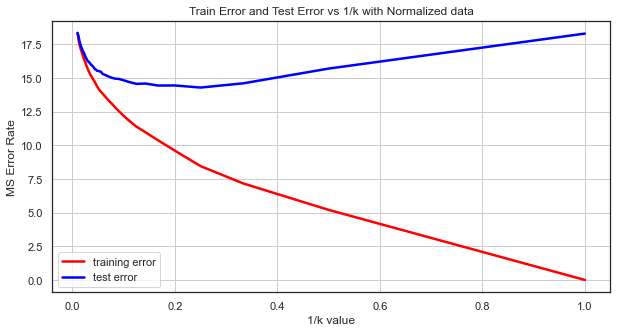

In [30]:
# Normalized data

training_error_rate_model14 = []
test_error_rate_model14 = []
for k in nn:
    model_14 = KNeighborsRegressor(n_neighbors=k)
    model_14.fit(X_train_scaled, y_train)
    yhat_5 = model_14.predict(X_train_scaled)
    yhat_6 = model_14.predict(X_test_scaled)
    training_error_rate_model14.append(round(mean_squared_error(y_train, yhat_5),3))
    test_error_rate_model14.append(round(mean_squared_error(y_test, yhat_6),3))


#Use the index to find the k* 
best_test_Error = test_error_rate_model14.index(min(test_error_rate_model14))
print('Manhattan Weighted Distance:')
print('Best testing error K* = ', nn[best_test_Error])
print('Best testing error = ', round(min(test_error_rate_model14),4))

#Plot train and test errors 
plt.figure(figsize=(10,5))
plt.plot(z, training_error_rate_model14, label="training error", c = 'red', lw = 2.5)
plt.plot(z, test_error_rate_model14, label="test error", c = 'blue', lw = 2.5)
plt.ylabel("MS Error Rate")
plt.xlabel("1/k value")
plt.title('Train Error and Test Error vs 1/k with Normalized data')
plt.legend()
plt.grid()

When with raw features, we should select K* = 5, which has minimum Test Error 15.727

When with normalized, we should select K* = 4, which has minimum Test Error 14.291

### (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

The lowest testing error in linear regression model is 18.66, which exists collinearity and non-linearity of the response-predictor relationships.

The lowest testing error in KNN Regression model is 14.291, which use k=4 with Normalized data.

KNN Regressino is better fit to this data because the relationship between the predictors and response exist highly non-linear relationship, using more flexible model can triggeer less MSE and has less bias.